In [1]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-model/sign_language.h5


In [2]:
df=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
df.shape

(27455, 785)

In [5]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

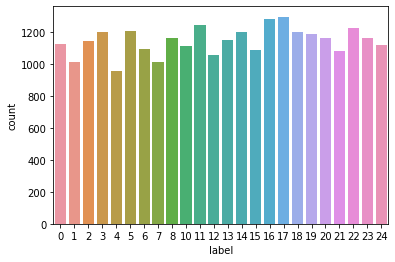

In [6]:
import seaborn as sns
sns.countplot('label',data=df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df.drop('label',axis=1)

In [9]:
y=df['label']

In [10]:
 x_train, x_valid, y_train, y_valid = train_test_split( x, y, test_size=0.2, random_state=42)

In [11]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
22706,97,65,128,44,17,67,64,66,69,72,...,189,180,134,97,76,86,94,90,91,91
1231,215,216,217,223,206,176,176,191,106,122,...,133,133,132,132,134,124,167,124,23,140
531,144,145,146,147,150,150,151,151,151,150,...,78,107,183,187,171,160,131,134,101,72
21099,64,73,83,96,101,108,111,115,118,122,...,163,167,169,169,170,173,173,175,175,176
17752,83,88,57,75,101,37,17,63,69,74,...,87,71,52,95,183,176,180,182,184,186


In [12]:
x_valid.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
16203,118,122,126,129,134,139,143,147,150,152,...,103,104,103,102,100,99,99,99,97,96
23292,173,173,174,174,175,176,176,177,177,178,...,146,139,127,100,177,232,220,223,223,221
7204,83,88,94,100,108,115,121,127,132,133,...,81,66,137,182,181,184,186,186,187,188
22591,167,169,168,167,167,169,169,169,169,169,...,223,223,222,221,220,220,218,217,218,193
3498,120,124,128,132,137,141,144,148,150,151,...,68,44,84,93,96,96,82,126,144,103


In [13]:
y_train

22706    10
1231     15
531       0
21099    10
17752    22
         ..
21575    15
5390      1
860      14
15795     7
23654    15
Name: label, Length: 21964, dtype: int64

In [14]:
y_valid

16203    24
23292     8
7204     18
22591     2
3498     24
         ..
17877    22
8025      4
11230     0
17654    20
9672      3
Name: label, Length: 5491, dtype: int64

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
y_train=label_binarizer.fit_transform(y_train)
y_valid=label_binarizer.transform(y_valid)

In [16]:
y_train.shape

(21964, 24)

In [17]:
x_train=x_train/255
x_valid=x_valid/255

In [18]:
x_train=x_train.values
x_train=x_train.reshape(-1,28,28,1)
# x_train.head()

In [19]:
x_valid=x_valid.values
x_valid=x_valid.reshape(-1,28,28,1)


In [20]:
import matplotlib.pyplot as plt

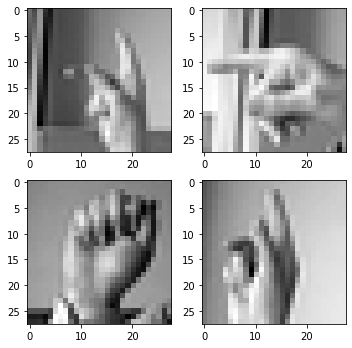

In [21]:
f, ax = plt.subplots(2,2) 
f.set_size_inches(5, 5)
k=0
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
#         ax[i,j].title.set_text(df['label'][k])
        k += 1
    plt.tight_layout() 

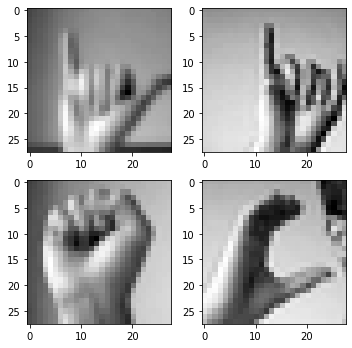

In [22]:
f, ax = plt.subplots(2,2) 
f.set_size_inches(5, 5)
k=0
for i in range(2):
    for j in range(2):
        ax[i,j].imshow(x_valid[k].reshape(28, 28) , cmap = "gray")
#         ax[i,j].title.set_text(df['label'][k])
        k += 1
    plt.tight_layout() 

In [23]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    rotation_range=15,
#                                    vertical_flip=True,
#                                    brightness_range=[0.5, 1.5],

#                                   )


In [24]:
# train_datagen.fit(x_train)

In [25]:
x_train.shape

(21964, 28, 28, 1)

In [26]:
from keras.callbacks import ReduceLROnPlateau

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose=1,factor=0.4, min_lr=0.00001)

In [28]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [29]:
from keras.models import Sequential


In [33]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(512,activation = 'relu'))

model.add(Dense(24, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [35]:
history = model.fit(x_train,y_train, batch_size = 16 ,epochs = 10 , validation_data = (x_valid, y_valid) , callbacks = [learning_rate_reduction])

Epoch 1/10
1373/1373 [==============================] - 11s 7ms/step - loss: 0.8103 - accuracy: 0.7856 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/10
1373/1373 [==============================] - 9s 7ms/step - loss: 0.0207 - accuracy: 0.9950 - val_loss: 8.1991e-04 - val_accuracy: 1.0000
Epoch 3/10
1373/1373 [==============================] - 9s 7ms/step - loss: 0.0432 - accuracy: 0.9878 - val_loss: 6.1226e-04 - val_accuracy: 0.9998
Epoch 4/10
1373/1373 [==============================] - 9s 7ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 2.6528e-04 - val_accuracy: 1.0000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 3.9999998989515007e-05.
Epoch 5/10
1373/1373 [==============================] - 9s 7ms/step - loss: 2.6592e-04 - accuracy: 1.0000 - val_loss: 8.2223e-05 - val_accuracy: 1.0000
Epoch 6/10
1373/1373 [==============================] - 9s 7ms/step - loss: 9.6754e-05 - accuracy: 1.0000 - val_loss: 7.0048e-05 - val_accuracy: 1.0000
Epoch 7/10
1373/1373 [===

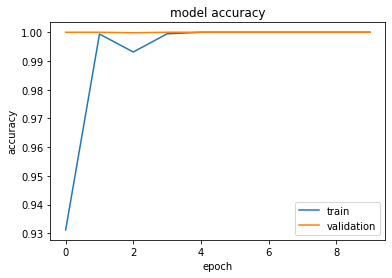

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

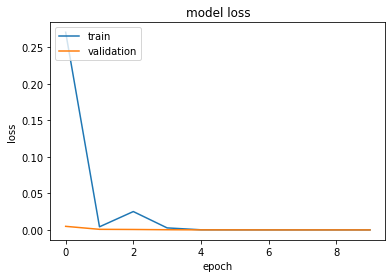

In [37]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [38]:
test=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [39]:
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [40]:
test.shape

(7172, 785)

In [41]:
y_test=test['label']

In [42]:
x_test=test.drop('label',axis=1)

In [43]:
x_test=x_test.values

In [44]:
x_test=x_test/255

In [45]:
x_test=x_test.reshape(-1,28,28,1)

In [46]:
 x_test[0].shape

(28, 28, 1)

In [47]:
prediction=model.predict(x_test)

In [48]:
lst=[]
for i in range(len(prediction)):
    if np.argmax(prediction[i])>=9:
         lst.append(np.argmax(prediction[i])+1)
    else:
        lst.append(np.argmax(prediction[i]))

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, lst)

0.947016174010039

In [51]:
y_test[0:10]

0     6
1     5
2    10
3     0
4     3
5    21
6    10
7    14
8     3
9     7
Name: label, dtype: int64

In [52]:
lst[0:10]

[6, 5, 10, 0, 3, 21, 10, 14, 3, 7]

In [53]:
test_image=x_test[0].reshape(1,28,28,1)

In [54]:
np.argmax(model.predict(test_image))

6

In [55]:
from sklearn.metrics import classification_report
print (classification_report(y_test,lst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       0.99      1.00      0.99       310
           3       0.94      1.00      0.97       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.95      0.92      0.94       348
           7       0.97      1.00      0.98       436
           8       0.88      0.86      0.87       288
          10       1.00      0.93      0.96       331
          11       0.87      1.00      0.93       209
          12       0.98      0.92      0.95       394
          13       0.99      0.93      0.96       291
          14       1.00      0.98      0.99       246
          15       1.00      0.99      1.00       347
          16       0.98      1.00      0.99       164
          17       0.75      0.64      0.69       144
          18       0.84    

In [56]:
model.save("sign_language_prediction_model.h5")

In [57]:
import keras

In [59]:
new_model = keras.models.load_model("./sign_language_prediction_model.h5")